# MBA DE JORNALISMO DE DADOS

---

### Python II - Cases

**Case 1: falta de punição a integrantes da GCM**

Este notebook remonta análise de dados originalmente feita no segundo trimestre de 2018, por Rodolfo Viana. O estudo gerou uma reportagem veiculada no SP1, da Rede Globo de São Paulo, em 4 de junho daquele ano, sobre leniência da Corregedoria da Guarda Civil Metropolitana de São Paulo em relação a desvios de conduta de seus integrantes [[assista à reportagem](https://globoplay.globo.com/v/6784525/)].

Para isso, são usadas as bases originais enviadas pela Secretaria Municipal de Segurança Urbana do município de São Paulo após solicitações realizadas com base na Lei de Acesso à Informação [veja as solicitações [aqui](https://drive.google.com/file/d/1xbwiYm3iVydoARchqkYplyIYEVe_ru1c/view?usp=sharing) e [aqui](https://drive.google.com/file/d/1u9aFq6l4gPhATCX89ZMhLP97RolASbrb/view?usp=sharing)].

Os dados disponibilizados pelo órgão (dois arquivos `.xlsx`) estão disponíveis [aqui](https://docs.google.com/spreadsheets/d/1UJJSL7Hl6KabPgmPwTH4Z0NWT3E6ty3_/edit?usp=sharing&ouid=117683144528811552014&rtpof=true&sd=true) e [aqui](https://docs.google.com/spreadsheets/d/1nXu14xiENW7xHl_b_N7at4Xg1pVaH3ap/edit?usp=sharing&ouid=117683144528811552014&rtpof=true&sd=true). O primeiro abrange sindicâncias e inquéritos na Corregedoria no período de 2016 e 2017; o segundo, 2014 e 2015.

In [1]:
# Importação de ferramentas
import warnings
warnings.filterwarnings("ignore")
# Documentação: https://docs.python.org/3.8/library/warnings.html#warnings.filterwarnings

import pandas as pd

### Preparação das bases

Ao observar os arquivos enviados pelo órgão, notamos que eles não seguem um padrão. Ambos contêm dados divididos em abas (uma para sindicância, uma para inquérito etc.), porém o arquivo referente a 2014-2015 tem mais abas. O motivo: a natureza do processo administrativo (`Natureza_sind`, por exemplo) está em aba separada às informaçãos gerais do processo administrativo (`Sindicâncias`).

Apesar disso, as abas se relacionam por meio da chave `NºProc`. Então é possível vincular cada registro em `Natureza_sind` ao seu registro em `Sindicâncias` por meio do campo `NºProc`. Faremos isso mais para frente.

Por ora, vamos ler os dados e observar a estrutura da base.

In [2]:
# Leitura das primeira e sexta abas do primeiro arquivo
df1_sind = pd.read_excel(
    '02a_case_base.XLSX', 
    sheet_name=0, 
    engine='openpyxl'
)
df1_sind_nat = pd.read_excel(
    '02a_case_base.XLSX', 
    sheet_name=5, 
    engine='openpyxl'
)
# Documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [3]:
# Visualização de informações
df1_sind.info()
df1_sind_nat.info()
# Documentação: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NºProc               426 non-null    int64         
 1   Tipo                 426 non-null    object        
 2   DataAutuação         426 non-null    datetime64[ns]
 3   Penalidade Recebida  426 non-null    object        
 4   Natureza             1 non-null      object        
 5   Status               426 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 20.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   NºProc    233 non-null    int64 
 1   Natureza  233 non-null    object
 2   Tipo      233 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.6+ KB


In [4]:
# Visualização do começo da base
df1_sind.head()
# Documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

,NºProc,Tipo,DataAutuação,Penalidade Recebida,Natureza,Status
0,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,Planilha natureza_sind,encerrado
1,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,NaN,encerrado
2,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,NaN,encerrado
3,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,NaN,encerrado
4,201400026926,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,NaN,encerrado


In [5]:
df1_sind_nat.head()

,NºProc,Natureza,Tipo
0,201400026853,ato incompatível com a função,SINDICÂNCIA
1,201400026926,ato incompatível com a função,SINDICÂNCIA
2,201400027000,ato incompatível com a função,SINDICÂNCIA
3,201400027124,insubordinação,SINDICÂNCIA
4,201400027175,ato incompatível com a função,SINDICÂNCIA


In [6]:
# Visualização do fim da base
df1_sind.tail()
# Documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html

,NºProc,Tipo,DataAutuação,Penalidade Recebida,Natureza,Status
421,201503305402,SINDICÂNCIA,2015-12-11,ARQUIVAMENTO,NaN,encerrado
422,201503305305,SINDICÂNCIA,2015-12-11,ARQUIVAMENTO,NaN,encerrado
423,201503305240,SINDICÂNCIA,2015-12-15,ARQUIVAMENTO,NaN,encerrado
424,201503425688,SINDICÂNCIA,2015-12-28,ARQUIVAMENTO,NaN,encerrado
425,201503425688,SINDICÂNCIA,2015-12-28,ARQUIVAMENTO,NaN,encerrado


In [7]:
df1_sind_nat.tail()

,NºProc,Natureza,Tipo
228,201503284880,disparo de arma de fogo,SINDICÂNCIA
229,201503305402,abuso de autoridade / poder,SINDICÂNCIA
230,201503305305,assédio moral,SINDICÂNCIA
231,201503305240,assédio moral,SINDICÂNCIA
232,201503425688,falta de urbanidade,SINDICÂNCIA


`info()`, `head()` e `tail()` trouxeram informações relevantes sobre como os dados estão dispostos.

Na base `df1_sind`,

- há 426 registros
- não há valores nulos
- em `Natureza` há apenas 1 registro
- `NºProc` está com o tipo `int`

Na base `df1_sind_nat`,

- há 233 registros
- não há valores nulos
- `NºProc` está com o tipo `int`

Algumas observações:

1. A coluna `Natureza` em `df1_sind` pode ser deletada, pois contém apenas uma observação para acessar outra aba. Uma checagem no arquivo de Excel nos leva a essa compreensão.

2. Com Pandas na versão 1.1, a base `df1_sind_nat` apresentou 662 registros com apenas 233 não nulos é simples. Isso não ocorreu com Pandas 1.3.3. A diferença entre os número se explica: são linhas vazias (ou seja, todos os campos aparecem como `NaN`, que significa `not a number`; são campos vazios e, portanto, descartáveis). Isso acontece, entre outros motivos, quando temos um Excel e damos `Enter` nas linhas, mas não preenchemos com nada: fica registrado que a linha foi usada, mas não há valor algum. Neste caso, precisaríamos cortar essas linhas com `df1_sind_nat.dropna(inplace=True)`, cuja documentação está aqui: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

3. Pandas 1.1 também trouxe `NºProc` de `df1_sind_nat` como `float`, o que não ocorreu com Pandas 1.3.3. Nesse caso, a coluna precisaria ser normalizada (ou seja, convertida para o mesmo tipo) antes de juntarmos as bases. Isso é possível com `df1_sind_nat['NºProc'] = df1_sind_nat['NºProc'].astype(int)`, e a documentação é esta: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html

Vamos deletar a coluna `Natureza` em `df1_sind`.

In [8]:
# Remoção de coluna
df1_sind.drop('Natureza', axis=1, inplace=True)
# Documentação: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

Agora que temos os tipos iguais, podemos mesclar as duas bases. `merge()` funciona para isso -- digamos que seja a versão Python do `JOIN` em SQL.

In [9]:
# Fusão das bases a partir de NºProc
df1 = pd.merge(
    df1_sind, 
    df1_sind_nat, 
    on='NºProc', 
    how='inner'
)
# Documentação: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [10]:
# Checagem
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 425
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NºProc               426 non-null    int64         
 1   Tipo_x               426 non-null    object        
 2   DataAutuação         426 non-null    datetime64[ns]
 3   Penalidade Recebida  426 non-null    object        
 4   Status               426 non-null    object        
 5   Natureza             426 non-null    object        
 6   Tipo_y               426 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 26.6+ KB


,NºProc,Tipo_x,DataAutuação,Penalidade Recebida,Status,Natureza,Tipo_y
0,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,encerrado,ato incompatível com a função,SINDICÂNCIA
1,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,encerrado,ato incompatível com a função,SINDICÂNCIA
2,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,encerrado,ato incompatível com a função,SINDICÂNCIA
3,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,encerrado,ato incompatível com a função,SINDICÂNCIA
4,201400026926,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,encerrado,ato incompatível com a função,SINDICÂNCIA


Observamos que a coluna `Tipo` foi duplicada, e agora temos `Tipo_x` e `Tipo_y`. Isso é normal quando usamos `merge()` e ambas as bases têm coluna com o mesmo nome. Podemos, então, descartar uma delas, pois os dados são os mesmos em ambas.

Também vamos checar quais os valores da coluna `Status`, pois se todos eles forem "encerrado", podemos descartar.

In [11]:
# Descarte de coluna Tipo_y
df1.drop('Tipo_y', axis=1, inplace=True)

In [12]:
# Observação dos valores únicos de Status
df1['Status'].unique()
# Documentação: https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html

array(['encerrado'], dtype=object)

De fato, a coluna `Status` tem apenas um valor: "encerrado". Vamos descartar.

In [13]:
# Descarte da coluna Status
df1.drop('Status', axis=1, inplace=True)

Por uma questão estilística, gosto de renomear as colunas para algo mais simples -- sem espaços, sem caractereres especiais etc. Faremos isso.

In [14]:
# Renomeação de colunas
df1.rename(
    columns={
        "NºProc": "id",
        "Tipo_x": "tipo",
        "DataAutuação": "data",
        "Penalidade Recebida": "penalidade",
        "Natureza": "delito"
    }, 
    inplace=True
)
# Documentação: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

Temos, com isso, a base de sindicâncias de 2014 e 2015 pronta. Agora precisamos:

1. preparar a base de 2016 e 2017,

2. juntar as duas bases numa só, de 2014 a 2017

(Isso apenas com sindicância, por ora. Depois repetiremos o processo com inquéritos.)

Diferentemente da base de 2014 e 2015, a mais recente não tem uma aba exclusiva para natureza dos delitos. Essas informações estão na mesma aba de sindicâncias.

In [15]:
# Leitura das primeira aba do segundo arquivo
df2_sind = pd.read_excel(
    '02b_case_base.XLSX', 
    sheet_name=0, 
    engine='openpyxl'
)

In [16]:
# Observação dos dados
df2_sind.info()
df2_sind.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NºProc               368 non-null    int64         
 1   Tipo                 368 non-null    object        
 2   DataAutuação         368 non-null    datetime64[ns]
 3   Dt Dos Fatos         270 non-null    datetime64[ns]
 4   Penalidade Recebida  368 non-null    object        
 5   Natureza             367 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 17.4+ KB


,NºProc,Tipo,DataAutuação,Dt Dos Fatos,Penalidade Recebida,Natureza
0,201601875670,SINDICÂNCIA,2016-08-17,NaT,EM ANDAMENTO,exercício ilegal de atividade/profissão
1,201601875670,SINDICÂNCIA,2016-08-17,NaT,EM ANDAMENTO,exercício ilegal de atividade/profissão
2,201601875670,SINDICÂNCIA,2016-08-17,NaT,EM ANDAMENTO,exercício ilegal de atividade/profissão
3,201601875670,SINDICÂNCIA,2016-08-17,NaT,EM ANDAMENTO,exercício ilegal de atividade/profissão
4,201601875670,SINDICÂNCIA,2016-08-17,NaT,EM ANDAMENTO,exercício ilegal de atividade/profissão


Existe uma coluna diferente da base anterior: `Dt Dos Fatos`. Para nós isso não é importante, pois a data que consideramos é a de autuação. Vamos descartar.

In [17]:
# Descarte de Dt Dos Fatos
df2_sind.drop('Dt Dos Fatos', axis=1, inplace=True)

Para juntar `df1` e `df2_sind`, precisamos que ambas tenham os mesmos nomes nas colunas.

In [18]:
# Renomeação de colunas
df2_sind.rename(
    columns={
        "NºProc": "id",
        "Tipo": "tipo",
        "DataAutuação": "data",
        "Penalidade Recebida": "penalidade",
        "Natureza": "delito"
    }, 
    inplace=True
)

Vamos ver se ambas as bases estão semelhantes (em tipos, em nomes de colunas etc.).

In [19]:
# Checagem da primeira base
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 425
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          426 non-null    int64         
 1   tipo        426 non-null    object        
 2   data        426 non-null    datetime64[ns]
 3   penalidade  426 non-null    object        
 4   delito      426 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 20.0+ KB


,id,tipo,data,penalidade,delito
0,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função
1,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função
2,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função
3,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função
4,201400026926,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função


In [20]:
# Checagem da segunda base
df2_sind.info()
df2_sind.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          368 non-null    int64         
 1   tipo        368 non-null    object        
 2   data        368 non-null    datetime64[ns]
 3   penalidade  368 non-null    object        
 4   delito      367 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 14.5+ KB


,id,tipo,data,penalidade,delito
0,201601875670,SINDICÂNCIA,2016-08-17,EM ANDAMENTO,exercício ilegal de atividade/profissão
1,201601875670,SINDICÂNCIA,2016-08-17,EM ANDAMENTO,exercício ilegal de atividade/profissão
2,201601875670,SINDICÂNCIA,2016-08-17,EM ANDAMENTO,exercício ilegal de atividade/profissão
3,201601875670,SINDICÂNCIA,2016-08-17,EM ANDAMENTO,exercício ilegal de atividade/profissão
4,201601875670,SINDICÂNCIA,2016-08-17,EM ANDAMENTO,exercício ilegal de atividade/profissão


Estão com os mesmos tipos, os mesmos nomes... Podemos juntá-las.

In [21]:
# Concatenação de bases
sindicancias = pd.concat(
    [df1, df2_sind],
    ignore_index=True
)
# Documentação: https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [22]:
# Checagem
sindicancias.info()
sindicancias.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          794 non-null    int64         
 1   tipo        794 non-null    object        
 2   data        794 non-null    datetime64[ns]
 3   penalidade  794 non-null    object        
 4   delito      793 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 31.1+ KB


,id,tipo,data,penalidade,delito
0,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função
1,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função
2,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função
3,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função
4,201400026926,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função


Opa! Temos 794 registros, mas 1 valor nulo para `delito`. Vamos checar.

In [23]:
# Checagem
sindicancias[sindicancias['delito'].isna()]
# Documentação: https://pandas.pydata.org/docs/reference/api/pandas.Series.isna.html

,id,tipo,data,penalidade,delito
729,201700588210,SINDICÂNCIA,2017-04-06,ARQUIVAMENTO,NaN


Ao conferir no Excel, de fato este valor está vazio. Vamos preencher com "incerto".

In [24]:
# Preenchimento
sindicancias.loc[729, 'delito'] = "incerto"
# Documentação: https://pandas.pydata.org/docs/reference/api/pandas.Series.loc.html

In [25]:
# Checagem
sindicancias.iloc[729]
# Documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

id                   201700588210
tipo                  SINDICÂNCIA
data          2017-04-06 00:00:00
penalidade           ARQUIVAMENTO
delito                    incerto
Name: 729, dtype: object

Agora vamos checar se está tudo certo...

In [26]:
# Checagem
sindicancias.info()
sindicancias.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          794 non-null    int64         
 1   tipo        794 non-null    object        
 2   data        794 non-null    datetime64[ns]
 3   penalidade  794 non-null    object        
 4   delito      794 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 31.1+ KB


,id,tipo,data,penalidade,delito
0,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função
1,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função
2,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função
3,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função
4,201400026926,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função


Pronto. Temos os dados de sindicâncias preparados.

Vamos passar para os dados de inquérito. O processo deve ser bastante similar.

In [27]:
# Leitura das segunda e oitava abas do primeiro arquivo
df1_inq = pd.read_excel(
    '02a_case_base.XLSX', 
    sheet_name=1, 
    engine='openpyxl'
)
df1_inq_nat = pd.read_excel(
    '02a_case_base.XLSX', 
    sheet_name=7, 
    engine='openpyxl'
)

In [28]:
# Visualização de informações
df1_inq.info()
df1_inq_nat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NºProc               132 non-null    int64         
 1   Tipo                 132 non-null    object        
 2   DataAutuação         132 non-null    datetime64[ns]
 3   Penalidade Recebida  110 non-null    object        
 4   Natureza             1 non-null      object        
 5   Status               132 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 6.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   NºProc    109 non-null    int64 
 1   Natureza  107 non-null    object
 2   Tipo      109 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.7+ KB


In [29]:
# Remoção de coluna
df1_inq.drop('Natureza', axis=1, inplace=True)

In [30]:
# Fusão das bases a partir de NºProc
df2 = pd.merge(
    df1_inq, 
    df1_inq_nat, 
    on='NºProc', 
    how='inner'
)

In [31]:
# Checagem
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 132
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NºProc               133 non-null    int64         
 1   Tipo_x               133 non-null    object        
 2   DataAutuação         133 non-null    datetime64[ns]
 3   Penalidade Recebida  111 non-null    object        
 4   Status               133 non-null    object        
 5   Natureza             131 non-null    object        
 6   Tipo_y               133 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 8.3+ KB


,NºProc,Tipo_x,DataAutuação,Penalidade Recebida,Status,Natureza,Tipo_y
0,201400048016,INQUÉRITO ADMINISTRATIVO,2014-01-08,SUSPENSÃO,encerrado,faltas interpoladas,INQUÉRITO ADMINISTRATIVO
1,201400122526,INQUÉRITO ADMINISTRATIVO,2014-01-15,SUSPENSÃO,encerrado,abandono de posto / função,INQUÉRITO ADMINISTRATIVO
2,201400263880,INQUÉRITO ADMINISTRATIVO,2014-01-28,SUSPENSÃO,encerrado,falso testemunho,INQUÉRITO ADMINISTRATIVO
3,201400263880,INQUÉRITO ADMINISTRATIVO,2014-01-28,SUSPENSÃO,encerrado,NaN,INQUÉRITO ADMINISTRATIVO
4,201400360443,INQUÉRITO ADMINISTRATIVO,2014-02-06,DEMISSÃO,encerrado,faltas consecutivas,INQUÉRITO ADMINISTRATIVO


In [32]:
# Descarte de coluna Tipo_y
df2.drop('Tipo_y', axis=1, inplace=True)

In [33]:
# Observação dos valores únicos de Status
df2['Status'].unique()

array(['encerrado', 'em andamento'], dtype=object)

Ao contrário da base de sindicâncias, a base de inquéritos, na coluna `Status`, tem dois valores. Só poderemos deletar a coluna se esses valores, de maneira literal ou inferida, estiverem na coluna `Penalidade Recebida`. 

In [34]:
# Observação com filtro
df2[df2['Status'] == 'em andamento']

,NºProc,Tipo_x,DataAutuação,Penalidade Recebida,Status,Natureza
15,201401041422,INQUÉRITO ADMINISTRATIVO,2014-04-10,NaN,em andamento,disparo de arma de fogo
16,201401041643,INQUÉRITO ADMINISTRATIVO,2014-04-10,NaN,em andamento,extravio / perda de bens patrimoniais
19,201401041643,INQUÉRITO ADMINISTRATIVO,2014-04-10,NaN,em andamento,extravio / perda de bens patrimoniais
20,201401041643,INQUÉRITO ADMINISTRATIVO,2014-04-10,NaN,em andamento,extravio / perda de bens patrimoniais
21,201401041643,INQUÉRITO ADMINISTRATIVO,2014-04-10,NaN,em andamento,extravio / perda de bens patrimoniais
22,201401041643,INQUÉRITO ADMINISTRATIVO,2014-04-10,NaN,em andamento,extravio / perda de bens patrimoniais
23,201401041643,INQUÉRITO ADMINISTRATIVO,2014-04-10,NaN,em andamento,extravio / perda de bens patrimoniais
68,201500120061,INQUÉRITO ADMINISTRATIVO,2015-01-16,NaN,em andamento,descumprimento de ordem
69,201500218630,INQUÉRITO ADMINISTRATIVO,2015-01-28,NaN,em andamento,homicídio
72,201500407484,INQUÉRITO ADMINISTRATIVO,2015-02-19,NaN,em andamento,exercício de atividade laboral em LM


Quando `Status` é "em andamento", `Penalidade Recebida` é `NaN`. Podemos preencher valores nulos na coluna `Penalidade Recebida` com "em andamento" e descartar `Status`. Mas antes precisamos ver se valores nulos aparecem **apenas** com `Status` "em andamento".

In [35]:
# Observação com dois filtros
df2[(df2['Status'] != 'em andamento') & (df2['Penalidade Recebida'].isna())]

,NºProc,Tipo_x,DataAutuação,Penalidade Recebida,Status,Natureza


Realmente há valores vazios em `Penalidade Recebida` apenas quando `Status` não é "em andamento". Então podemos preencher e, em seguida, deletar `Status`.

In [36]:
# Preenchimento de valores nulos
df2['Penalidade Recebida'] = df2['Penalidade Recebida'].fillna('EM ANDAMENTO')
# Observação: usei letras maiúsculas porque todos os valores da coluna são assim
# Documentação: https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html

In [37]:
# Descarte de coluna Status
df2.drop('Status', axis=1, inplace=True)

In [38]:
# Checagem
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 132
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NºProc               133 non-null    int64         
 1   Tipo_x               133 non-null    object        
 2   DataAutuação         133 non-null    datetime64[ns]
 3   Penalidade Recebida  133 non-null    object        
 4   Natureza             131 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 6.2+ KB


Há dois valores nulos em `Natureza`. Vamos corrigir isso, mas se corrigirmos agora, enquanto trabalhamos a base 2014-2015, pode ser que tenhamos de corrigir novamente depois, ao trabalharmos a base 2016-2017. Melhor é juntar as duas bases agora para, depois, efetuar correções.

Por ora, vamos apenas renomear a coluna `Tipo_x` para `Tipo`, como era originalmente e como também está na base seguinte.

In [39]:
# Renomeação de coluna
df2.rename(columns={'Tipo_x': 'Tipo'}, inplace=True)

In [40]:
# Leitura da segunda aba do segundo arquivo
df2_inq = pd.read_excel(
    '02b_case_base.XLSX', 
    sheet_name=1, 
    engine='openpyxl'
)

In [41]:
# Checagem
df2_inq.info()
df2_inq.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NºProc               182 non-null    int64         
 1   Tipo                 182 non-null    object        
 2   DataAutuação         182 non-null    datetime64[ns]
 3   Dt Dos Fatos         122 non-null    datetime64[ns]
 4   Penalidade Recebida  182 non-null    object        
 5   Natureza             182 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 8.7+ KB


,NºProc,Tipo,DataAutuação,Dt Dos Fatos,Penalidade Recebida,Natureza
0,201600384362,INQUÉRITO ADMINISTRATIVO,2016-02-17,NaT,EM ANDAMENTO,exercício ilegal de atividade/profissão
1,201600384427,INQUÉRITO ADMINISTRATIVO,2016-02-17,2015-01-11,EM ANDAMENTO,porte ilegal de arma
2,201600441749,INQUÉRITO ADMINISTRATIVO,2016-02-22,2015-10-05,EM ANDAMENTO,furto de arma particular
3,201600626021,INQUÉRITO ADMINISTRATIVO,2016-03-15,NaT,EM ANDAMENTO,exercício de atividade laboral em LM
4,201600805023,INQUÉRITO ADMINISTRATIVO,2016-04-05,2016-03-26,EM ANDAMENTO,violência doméstica/Lei Maria da Penha


In [42]:
# Remoção da coluna Dt Dos Fatos
df2_inq.drop('Dt Dos Fatos', axis=1, inplace=True)

In [43]:
# Checagem de ambas as bases para concatenação
df2.info()
df2_inq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 132
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NºProc               133 non-null    int64         
 1   Tipo                 133 non-null    object        
 2   DataAutuação         133 non-null    datetime64[ns]
 3   Penalidade Recebida  133 non-null    object        
 4   Natureza             131 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 6.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NºProc               182 non-null    int64         
 1   Tipo                 182 non-null    object        
 2   DataAutuação         182 non-null    datetime64[ns]
 3   Penalidade Recebida  182 non-null 

In [44]:
# Concatenação de bases
inqueritos = pd.concat(
    [df2, df2_inq],
    ignore_index=True
)

In [45]:
# Checagem
inqueritos.info()
inqueritos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NºProc               315 non-null    int64         
 1   Tipo                 315 non-null    object        
 2   DataAutuação         315 non-null    datetime64[ns]
 3   Penalidade Recebida  315 non-null    object        
 4   Natureza             313 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 12.4+ KB


,NºProc,Tipo,DataAutuação,Penalidade Recebida,Natureza
0,201400048016,INQUÉRITO ADMINISTRATIVO,2014-01-08,SUSPENSÃO,faltas interpoladas
1,201400122526,INQUÉRITO ADMINISTRATIVO,2014-01-15,SUSPENSÃO,abandono de posto / função
2,201400263880,INQUÉRITO ADMINISTRATIVO,2014-01-28,SUSPENSÃO,falso testemunho
3,201400263880,INQUÉRITO ADMINISTRATIVO,2014-01-28,SUSPENSÃO,NaN
4,201400360443,INQUÉRITO ADMINISTRATIVO,2014-02-06,DEMISSÃO,faltas consecutivas


A exemplo de sindicâncias, vamos preencher os valores nulos de `Natureza` com "incerto".

In [46]:
# Preenchimento de campos vazios
inqueritos['Natureza'] = inqueritos['Natureza'].fillna('incerto')

Por fim, precisamos renomear as colunas, assim como fizemos com sindicâncias.

In [47]:
# Renomeação de colunas
inqueritos.rename(
    columns={
        "NºProc": "id",
        "Tipo": "tipo",
        "DataAutuação": "data",
        "Penalidade Recebida": "penalidade",
        "Natureza": "delito"
    }, 
    inplace=True
)

Neste momento, temos duas bases (sindicâncias e inquéritos), ambas compreendendo o período de 2014 a 2017. Vamos checar.

In [48]:
# Checagem
sindicancias.info()
inqueritos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          794 non-null    int64         
 1   tipo        794 non-null    object        
 2   data        794 non-null    datetime64[ns]
 3   penalidade  794 non-null    object        
 4   delito      794 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 31.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          315 non-null    int64         
 1   tipo        315 non-null    object        
 2   data        315 non-null    datetime64[ns]
 3   penalidade  315 non-null    object        
 4   delito      315 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
mem

Podemos juntar as duas bases ou trabalhar separadamente. Na pauta original, de 2018, trabalhei separadamente porque sindicâncias e inquéritos têm características diferentes, como o prazo de apuração. 

Veremos isso no processo de análise.

### Análise de dados

Antes de iniciarmos uma análise, é preciso entender o que desejamos analisar e ter alguma "intimidade" com o que vamos analisar. No caso deste estudo, consultei especialistas para compreender, por exemplo, a diferença entre sindicância e inquérito administrativo.

Em suma, a **sindicância** tem por objetivo esclarecer fatos irregulares. O órgão levanta provas, faz relatórios de apuração e nem sempre demanda a presença do integrante envolvido no fato. É a parte preliminar do processo administrativo e pode ensejar arquivamento (quando não há provas, por exemplo), punição de algum tipo (mais ou menos branda) ou, ainda, um inquérito.  


O **inquérito**, por sua vez, é a parte contraditória do processo. Neste caso, o integrante envolvido constitui advogado, reúne elementos de defesa etc. Pode ser arquivado, levar a punições de severidade variada, ou o integrante pode ser inocentado.

Há outras diferenças entre os dois, como o tempo para apuração. De acordo com a lei 8.989, de 1979 (Estatuto dos Funcionários Públicos do Município de São Paulo),

> Art. 206: A sindicância deverá estar concluída no prazo de trinta dias, que só poderá ser prorrogado mediante justificação fundamentada.

Assim, se quero saber quantas sindicâncias extrapolaram o prazo legal em janeiro de 2018, vale um recorte mais detalhado nas sindicâncias abertas até 30 de novembro de 2017 -- que, em tese, já deveriam ter sido concluídas até janeiro de 2018.

> Art. 209: O inquérito administrativo será iniciado no prazo de 5 (cinco) dias, contados do recebimento dos autos pela Comissão Processante e concluído no prazo de 90 (noventa) dias, contados do seu início.
§ 1º. O prazo para a conclusão do inquérito poderá ser prorrogado, a juízo da autoridade que determinou sua instauração, mediante justificação fundamentada.

Interessam-nos os inquéritos, portanto, que vão até 30 de setembro de 2017 -- ou seja, que, em janeiro de 2018, deveriam estar concluídos.

Essas informações são relevantes para delimitarmos o escopo de nossa análise e evitar conclusões equivocadas.

#### Lógica da análise

Enfim, o que queremos saber e como chegaremos a respostas desejadas? Vale delinear esses elementos para não nos perdermos -- e nem perdermos tempo, o que é vital em redação.

Na aula, faremos sobre sindicâncias; para casa, façam sobre inquéritos.

Queremos saber:

**1. Quantas sindicâncias foram abertas no período? Quantos guardas estão nelas envolvidos?**

In [49]:
# Contagem de ids (ou seja, processos) únicos
sindicancias['id'].nunique()
# Documentação: https://pandas.pydata.org/docs/reference/api/pandas.Series.nunique.html

432

In [50]:
# Contagem de linhas no DataFrame (lembrando que cada linha é um guarda)
len(sindicancias)

794

**Resposta:** De janeiro de 2014 a dezembro de 2017 foram instauradas 432 sindicâncias envolvendo 794 guardas civis. (Lembrando que o mesmo guarda pode estar envolvido em mais de uma sindicância e não temos como apurar isso com os dados, uma vez que não há identificação dos guardas em cada sindicância. É preciso cautela ao usar essa informação. Na reportagem, a quantidade de guardas foi omitida justamente por isso.)

**2. Dessas sindicâncias, quantas deveriam estar encerradas em janeiro de 2018, mas não estavam?**

In [51]:
# Recorte da base:
# 1. com sindicâncias abertas antes de 30 de novembro de 2017
# 2. com penalidade "em andamento"
fora_prazo = sindicancias[(sindicancias['data'] <= '2017-11-30') & (sindicancias['penalidade'] == 'EM ANDAMENTO')]

In [52]:
# Contagem de ids únicos
fora_prazo['id'].nunique()

50

**Resposta:** Das 432 sindicâncias abertas entre janeiro de 2014 a dezembro de 2017, 50 extrapolam o prazo legal. (Há a possibilidade de prorrogação, desde que justificada. Na época eu solicitei à Corregedoria da GCM justificação para os 50 processos em questão, e não houve retorno.)

**2.1. Aprofundando a questão: em que ano foram abertas as sindicâncias que estão fora do prazo legal?**

In [53]:
# Observação de anos na base
fora_prazo['data'].dt.year.unique()
# Documentação 1: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.year.html
# Documentação 2: https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html

array([2016, 2017])

**Resposta:** As 50 sindicâncias fora do prazo legal são de 2016 e 2017.

**2.2. Aprofundando a questão: qual é o percentual de sindicâncias fora do prazo legal em cada ano?**

In [54]:
# Remoção de linhas duplicadas
fora_prazo.drop_duplicates(subset='id', keep='first', inplace=True)
# Documentação: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

# Criação da coluna para ano
fora_prazo['ano'] = fora_prazo['data'].dt.year

# Agrupamento de valores únicos de id por ano
fora_prazo_df = fora_prazo.groupby('ano')['id'].nunique().reset_index()
# Documentação: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [55]:
# Checagem
fora_prazo_df

,ano,id
0,2016,6
1,2017,44


Temos, com isso, a quantidade de processos fora do prazo por ano. Vamos ver o total de sindicâncias que deveriam estar encerradas por ano e, em seguida, fazer uma conta simples para ver o percentual.

In [56]:
# Recorte para ignorar sindicâncias que ainda estão no prazo legal
considera_prazo = sindicancias[sindicancias['data'] <= '2017-11-30']

# Remoção de linhas duplicadas
considera_prazo.drop_duplicates(subset='id', keep='first', inplace=True)

# Criação da coluna para ano
considera_prazo['ano'] = considera_prazo['data'].dt.year

# Agrupamento de valores únicos de id por ano
considera_prazo_agg = considera_prazo.groupby('ano')['id'].nunique().reset_index()

In [57]:
# Checagem
considera_prazo_agg

,ano,id
0,2014,122
1,2015,111
2,2016,102
3,2017,88


Interessam-nos apenas as linhas de 2016 e 2017.

In [58]:
# Filtro para os anos de 2016 e 2017
considera_prazo_agg = considera_prazo_agg[considera_prazo_agg['ano'].isin([2016, 2017])]
# Documentação: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html

Agora que temos um dataframe com todas as sindicâncias exceto aquelas no prazo legal e um dataframe com as sindicâncias ainda "em andamento", vamos fundir os dois, criar uma coluna e calcular o percentual.

In [59]:
# Junção dos dois dataframes
perc_fora_prazo = pd.merge(considera_prazo_agg, fora_prazo_df, on="ano", how="inner")
# Criação de coluna perc e cálculo
perc_fora_prazo['perc'] = perc_fora_prazo['id_y'] / perc_fora_prazo['id_x']

In [60]:
# Observação
perc_fora_prazo

,ano,id_x,id_y,perc
0,2016,102,6,0.058824
1,2017,88,44,0.500000


**Resposta:** Das 50 sindicâncias fora do prazo legal, 6 são de 2016 e representam 5,88% do total de 102 sindicâncias; 44 são de 2017 e representam 50% das 88 sindicâncias abertas naquele ano e que deveriam estar encerradas. Ou seja, **metade das sindicâncias abertas em 2017 que deveriam ter sido concluídas não foram**.

**3. Das sindicâncias encerradas, quantas levaram a algum tipo de punição?**

In [61]:
# Listagem de penalidades únicas aplicadas
sindicancias['penalidade'].unique()

array(['ARQUIVAMENTO', 'SUSPENSÃO', 'EXTINÇÃO SEM JULGAMENTO DO MÉRITO',
       'REPREENSÃO', 'ADVERTÊNCIA', 'DESCARACTERIZADO DO PROCESSO',
       'ABSOLVIÇÃO', 'DEIXA DE APLICAR A PENA', 'DADO PROVIMENTO',
       'ACOLHE A DEFESA', 'EXTINÇÃO COM JULGAMENTO DO MÉRITO',
       'APLICAÇÃO DIRETA DE PENALIDADE', 'EM ANDAMENTO',
       'ARQUIVAMENTO PELA DUPLICIDADE', 'EXTINÇÃO POR PRESCRIÇÃO',
       'INQUÉRITO ADMINISTRATIVO', 'PROCESSO SUMÁRIO'], dtype=object)

Dessa lista, há três categorias, segundo o que me falam especialistas à época:


- Punição
    - Suspensão
    - Repreensão
    - Advertência
    - Processo sumário
    - Aplicação direta de penalidade
    
    
- Não punição
    - Arquivamento
    - Extinção sem julgamento do mérito
    - Extinção com julgamento do mérito
    - Descaracterizado do processo
    - Absolvição
    - Deixa de aplicar a pena
    - Acolhe a defesa
    - Arquivamento pela duplicidade
    - Extinção por prescrição
    
    
- Incerto
    - Em andamento
    - Dado provimento
    - Inquérito administrativo
    
    
A lógica, portanto, seria sinalizar a punição como "sim", "não" ou "incerto" na base, de acordo com o valor em `penalidade`. Vamos fazer isso:

In [62]:
# Criação de lista com as categorias
punido = []
for row in sindicancias['penalidade']:
    if row in ['EM ANDAMENTO', 'INQUÉRITO ADMINISTRATIVO', 'DADO PROVIMENTO']:
        punido.append('incerto')
    elif row in ['SUSPENSÃO', 'REPREENSÃO', 'ADVERTÊNCIA', 'APLICAÇÃO DIRETA DE PENALIDADE', 'PROCESSO SUMÁRIO']:
        punido.append('sim')
    else:
        punido.append('não')
        
# Criação de coluna no DataFrame com valores da lista
sindicancias['punicao'] = punido

# Checagem
sindicancias.head()

,id,tipo,data,penalidade,delito,punicao
0,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função,não
1,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função,não
2,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função,não
3,201400026853,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função,não
4,201400026926,SINDICÂNCIA,2014-01-06,ARQUIVAMENTO,ato incompatível com a função,não


Como a pergunta cita "sindicâncias encerradas", temos de excluir aquelas "em andamento".

In [63]:
# Filtro
sindicancias_enc = sindicancias[sindicancias['penalidade'] != 'EM ANDAMENTO']

# Remoção de linhas duplicadas
sindicancias_enc.drop_duplicates(subset='id', keep='first', inplace=True)

# Agrupamento por punição
sindicancias_enc = sindicancias_enc.groupby(['punicao'])['id'].nunique().reset_index()

# Checagem
sindicancias_enc

,punicao,id
0,incerto,14
1,não,292
2,sim,70


**Resposta:** Das sindicâncias abertas no período e já encerradas, 292 não tiveram punição. Apenas 70 tiveram alguma penalidade.

**3.1. Qual o percentual de não punição?**

In [64]:
# Criação de coluna com percentual
sindicancias_enc['perc'] = sindicancias_enc['id'] / sindicancias_enc['id'].sum()

# Checagem
sindicancias_enc

,punicao,id,perc
0,incerto,14,0.037234
1,não,292,0.776596
2,sim,70,0.186170


**Resposta:** 77,6% das sindicâncias encerradas não levaram a punições.

**3.2. Qual o percentual de não punição por delito?**

In [65]:
# Recorte de todos os processos que não estão em andamento
sindicancias_del = sindicancias[sindicancias['penalidade'] != 'EM ANDAMENTO']

# Remoção de linhas duplicadas
sindicancias_del.drop_duplicates(subset='id', keep='first', inplace=True)

# Contagem do total de ocorrências por motivo, independentemente de punição
# Essa coluna, que conterá o mesmo valor para cada delito, terá duas utilidades:
# 1. uso para cálculo do percentual,
# 2. uso para gráfico
sindicancias_del['total'] = sindicancias_del.groupby(['delito'])['delito'].transform('count')
# Documentação: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html

# Agrupamento dos dados por motivo e punição
sind_final = sindicancias_del.groupby(['delito', 'total'])['punicao'].value_counts()

# Transformação em DataFrame
sind_final = pd.DataFrame(sind_final).rename(columns={'punicao': 'quantidade'}).reset_index()

# Definição da porcentagem
sind_final['porcentagem'] = sind_final['quantidade'] / sind_final['total']

# Checagem
sind_final.head()

,delito,total,punicao,quantidade,porcentagem
0,abandono de posto / função,1,sim,1,1.000000
1,abuso de autoridade / poder,14,não,14,1.000000
2,acidente de trânsito/colisão/choque,13,não,11,0.846154
3,acidente de trânsito/colisão/choque,13,incerto,1,0.076923
4,acidente de trânsito/colisão/choque,13,sim,1,0.076923


In [66]:
# Resposta
sind_final[sind_final['punicao'] == 'não'].sort_values('quantidade', ascending=False)

,delito,total,punicao,quantidade,porcentagem
15,ato incompatível com a função,59,não,44,0.745763
7,agressão,40,não,39,0.975000
9,ameaça,27,não,22,0.814815
63,lesão corporal,26,não,21,0.807692
71,outros,18,não,16,0.888889
1,abuso de autoridade / poder,14,não,14,1.000000
32,descumprimento de ordem,22,não,14,0.636364
40,exercício de atividade laboral em LM,14,não,12,0.857143
2,acidente de trânsito/colisão/choque,13,não,11,0.846154
59,homicídio,10,não,10,1.000000


**Resposta:** Considerando a quantidade e a gravidade do delito (sendo este último quesito uma observação subjetiva que interessa à reportagem), temos:

- de 40 sindicâncias por agressão, 98% terminaram sem punição
- de 26 sindicâncias por lesão corporal, 81% terminaram sem punição
- de 14 sindicâncias por abuso de autoridade, nenhuma terminou em punição
- de 27 sindicâncias por ameaça, 81% terminaram sem punição
- de 10 sindicâncias por homicídio, nenhuma terminou em punição

Passemos agora a inquéritos...

**4. Quantos inquéritos foram abertos no período? Quantos guardas estão neles envolvidos?**

In [67]:
# Contagem de ids (ou seja, processos) únicos
inqueritos['id'].nunique()

259

In [68]:
# Contagem de linhas no DataFrame (lembrando que cada linha é um guarda)
len(inqueritos)

315

**Resposta:** De janeiro de 2014 a dezembro de 2017 foram abertos 259 inquéritos administrativos envolvendo _supostamente_ 315 guardas civis. ("Supostamente" porque o mesmo guarda pode estar envolvido em mais de um inquérito e não temos como apurar isso com os dados, uma vez que não há identificação dos guardas em cada inquérito. É preciso cautela ao usar essa informação. Na reportagem exibida em 2018, a quantidade de guardas foi omitida justamente por isso.)

**5. Desses inquéritos, quantos deveriam estar encerrados em janeiro de 2018, mas não estavam?**

In [69]:
# Recorte da base:
# 1. com inquéritos abertas antes de 30 de setembro de 2017
# 2. com penalidade "em andamento"
fora_prazo = inqueritos[(inqueritos['data'] <= '2017-09-30') & (inqueritos['penalidade'] == 'EM ANDAMENTO')]

In [70]:
# Contagem de ids únicos
fora_prazo['id'].nunique()

128

**Resposta:** Dos 259 inquéritos abertos entre janeiro de 2014 a dezembro de 2017, 128 extrapolam o prazo legal. Numa conta de cabeça, temos **quase metade dos inquéritos fora do prazo legal**. (Há a possibilidade de prorrogação, desde que justificada. Na época eu solicitei à Corregedoria da GCM justificação para os 128 processos em questão, e não houve retorno.)

**5.1. Aprofundando a questão: em que ano foram abertos os inquéritos que estão fora do prazo legal?**

In [71]:
# Observação de anos na base
fora_prazo['data'].dt.year.unique()

array([2014, 2015, 2016, 2017])

**Resposta:** Os 128 inquéritos fora do prazo legal vão de 2014 a 2017. Ou seja, **há inquéritos engavetados desde 2014**.

**5.2. Aprofundando a questão: qual é o percentual de inquéritos fora do prazo legal em cada ano?**

In [72]:
# Remoção de duplicações
fora_prazo.drop_duplicates(subset='id', keep='first', inplace=True)

# Criação da coluna para ano
fora_prazo['ano'] = fora_prazo['data'].dt.year

# Agrupamento de valores únicos de id por ano
fora_prazo_df = fora_prazo.groupby('ano')['id'].nunique().reset_index()

# Checagem
fora_prazo_df

,ano,id
0,2014,2
1,2015,12
2,2016,55
3,2017,59


In [73]:
# Recorte para ignorar inquéritos que ainda estão no prazo legal
considera_prazo = inqueritos[inqueritos['data'].between('2014-01-01', '2017-09-30')]

# Remoção de duplicações
considera_prazo.drop_duplicates(subset='id', keep='first', inplace=True)

# Criação da coluna para ano
considera_prazo['ano'] = considera_prazo['data'].dt.year

# Agrupamento de valores únicos de id por ano
considera_prazo_agg = considera_prazo.groupby('ano')['id'].nunique().reset_index()

# Checagem
considera_prazo_agg

,ano,id
0,2014,48
1,2015,60
2,2016,81
3,2017,62


In [74]:
# Junção dos dois dataframes
perc_fora_prazo = pd.merge(
    considera_prazo_agg, fora_prazo_df, 
    on="ano", 
    how="inner", 
    suffixes=('_total', '_atrasado')
)

# Criação de coluna perc e cálculo
perc_fora_prazo['perc'] = perc_fora_prazo['id_atrasado'] / perc_fora_prazo['id_total']

# Observação
perc_fora_prazo

,ano,id_total,id_atrasado,perc
0,2014,48,2,0.041667
1,2015,60,12,0.200000
2,2016,81,55,0.679012
3,2017,62,59,0.951613


**Resposta:** Dos 128 inquéritos fora do prazo legal, 2 são de 2014 e representam 4,16% do total de 48 inquéritos abertos naqule ano; 12 são de 2015 (20% dos 60 inquéritos naquele ano); 55 são de 2016 (67,9% dos 81 naquele ano); 59 são de 2017 (95,16% dos 62 naquele ano). 

**6. Dos inquéritos encerrados, quantos levaram a algum tipo de punição?**

In [75]:
# Listagem de penalidades únicas aplicadas
inqueritos['penalidade'].unique()

array(['SUSPENSÃO', 'DEMISSÃO', 'ABSOLVIÇÃO',
       'EXTINÇÃO SEM JULGAMENTO DO MÉRITO', 'SOBRESTADO', 'ARQUIVAMENTO',
       'EM ANDAMENTO', 'EXONERAÇÃO', 'EXONERADO/DEMITIDO EM OUTRO PA',
       'DEMISSÃO À BEM DO SERVIÇO PÚBLICO', 'DECISÃO EM OUTRO PA',
       'EXTINÇÃO COM JULGAMENTO DO MÉRITO',
       'CONVERTE O JULGAMENTO EM DILIGÊNCIA', 'CASSAÇÃO DA APOSENTADORIA',
       'APLICAÇÃO DIRETA DE PENALIDADE'], dtype=object)

Dessa lista, há três categorias, segundo o que me falaram especialistas à época:


- Punição
    - Suspensão
    - Demissão
    - Exoneração
    - Demissão à bem do serviço público
    - Converte o julgamento em diligência
    - Cassação da aposentadoria
    - Aplicação direta de penalidade
    
    
- Não punição
    - Absolvição
    - Extinção sem julgamento do mérito
    - Extinção com julgamento do mérito
    - Arquivamento
    
    
- Incerto
    - Em andamento
    - Sobrestado (interrompido; quando, por exemplo, o guarda alvo do inquérito morre etc.) 
    - Exonerado ou demitido em outro processo administrativo (ou seja, houve punição em outro processo (por exemplo, exoneração) e, com isso, não houve neste processo)
    
    
A lógica, portanto, seria sinalizar a punição como "sim", "não" ou "incerto" na base, de acordo com o valor em `penalidade`. Vamos fazer isso:

In [76]:
# Criação de lista com as categorias
punido = []
for row in inqueritos['penalidade']:
    if row in ['EM ANDAMENTO', 'SOBRESTADO', 'EXONERADO/DEMITIDO EM OUTRO PA']:
        punido.append('incerto')
    elif row in ['ABSOLVIÇÃO', 'EXTINÇÃO SEM JULGAMENTO DO MÉRITO', 'EXTINÇÃO COM JULGAMENTO DO MÉRITO', 'ARQUIVAMENTO']:
        punido.append('não')
    else:
        punido.append('sim')

# Criação de coluna no DataFrame com valores da lista
inqueritos['punicao'] = punido

# Checagem
inqueritos.head()

,id,tipo,data,penalidade,delito,punicao
0,201400048016,INQUÉRITO ADMINISTRATIVO,2014-01-08,SUSPENSÃO,faltas interpoladas,sim
1,201400122526,INQUÉRITO ADMINISTRATIVO,2014-01-15,SUSPENSÃO,abandono de posto / função,sim
2,201400263880,INQUÉRITO ADMINISTRATIVO,2014-01-28,SUSPENSÃO,falso testemunho,sim
3,201400263880,INQUÉRITO ADMINISTRATIVO,2014-01-28,SUSPENSÃO,incerto,sim
4,201400360443,INQUÉRITO ADMINISTRATIVO,2014-02-06,DEMISSÃO,faltas consecutivas,sim


In [77]:
# Filtro
inqueritos_enc = inqueritos[inqueritos['penalidade'] != 'EM ANDAMENTO']

# Remoção de duplicatas
inqueritos_enc.drop_duplicates(subset='id', keep='first', inplace=True)

# Agrupamento por punição
inqueritos_enc = inqueritos_enc.groupby(['punicao'])['id'].nunique().reset_index()

# Checagem
inqueritos_enc

,punicao,id
0,incerto,5
1,não,39
2,sim,84


**Resposta:** Dos inquéritos abertos no período e já encerrados, 84 tiveram alguma punição; 39 não.

**6.1. Aprofundando a questão: qual o percentual de não punição?**

In [78]:
# Criação de coluna com percentual
inqueritos_enc['perc'] = inqueritos_enc['id'] / inqueritos_enc['id'].sum()

# Checagem
inqueritos_enc

,punicao,id,perc
0,incerto,5,0.039062
1,não,39,0.304688
2,sim,84,0.656250


**Resposta:** 30,4% dos inquéritos encerrados não levaram a punições.

**6.2. Aprofundando a questão: qual o percentual de não punição por delito?**

In [79]:
# Recorte de todos os processos que não estão em andamento
inqueritos_del = inqueritos[inqueritos['penalidade'] != 'EM ANDAMENTO']

# Remoção de duplicatas
inqueritos_del.drop_duplicates(subset='id', keep='first', inplace=True)

# Contagem do total de ocorrências por motivo, independentemente de punição
# Essa coluna, que conterá o mesmo valor para cada delito, terá duas utilidades:
# 1. uso para cálculo do percentual,
# 2. uso para gráfico
inqueritos_del['total'] = inqueritos_del.groupby(['delito'])['delito'].transform('count')

# Agrupamento dos dados por motivo e punição
inq_final = inqueritos_del.groupby(['delito', 'total'])['punicao'].value_counts()

# Transformação em DataFrame
inq_final = pd.DataFrame(inq_final).rename(columns={'punicao': 'quantidade'}).reset_index()

# Definição da porcentagem
inq_final['porcentagem'] = inq_final['quantidade'] / inq_final['total']

# Checagem
inq_final.head()

,delito,total,punicao,quantidade,porcentagem
0,abandono de posto / função,2,sim,2,1.0
1,abuso de autoridade / poder,1,não,1,1.0
2,acidente de trânsito/colisão/choque,1,sim,1,1.0
3,acúmulo indevido de cargo,2,sim,2,1.0
4,adulteração de sinal de veículo automotor,1,sim,1,1.0


In [80]:
# Checagem
sem_punicao = inq_final[inq_final['punicao'] == 'não'].sort_values('quantidade', ascending=False)
sem_punicao

,delito,total,punicao,quantidade,porcentagem
35,faltas consecutivas,36,não,15,0.416667
20,exercício de atividade laboral em LM,10,não,4,0.400000
38,faltas interpoladas,13,não,3,0.230769
10,ato incompatível com a função,6,não,2,0.333333
32,faltar com a verdade,3,não,2,0.666667
1,abuso de autoridade / poder,1,não,1,1.000000
26,falsidade de dcto publico,1,não,1,1.000000
47,latrocínio (roubo seguido de morte),1,não,1,1.000000
46,incerto,1,não,1,1.000000
29,falta de urbanidade,2,não,1,0.500000


**Resposta:** Considerando a quantidade e a gravidade do delito (sendo este último quesito uma observação subjetiva que interessa à reportagem), temos:

- o único inquérito de abuso de autoridade terminou sem punição
- o único inquérito de latrocínio terminou sem punição
- de 3 inquéritos de ameaça, 1 ficou sem punição (33%)
- de 3 inquéritos de violência doméstica, 1 ficou sem punição (33%)

**6.3. Aprodundando a questão: e qual o percentual de punição por delito?**

In [81]:
# Filtro dos demais dados (delitos) fora do DataFrame 'sem_punicao' 
inq_final[~inq_final['delito'].isin(
    sem_punicao['delito'].unique().tolist()
)].sort_values('quantidade', ascending=False)
# Documentação: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing
# Documentação: https://pandas.pydata.org/docs/reference/api/pandas.Series.tolist.html

,delito,total,punicao,quantidade,porcentagem
17,disparo de arma de fogo,5,sim,5,1.000000
39,furto,5,sim,4,0.800000
0,abandono de posto / função,2,sim,2,1.000000
3,acúmulo indevido de cargo,2,sim,2,1.000000
48,outros,2,sim,2,1.000000
21,exoneração ep,3,sim,2,0.666667
41,homicídio,2,sim,2,1.000000
40,furto,5,incerto,1,0.200000
52,tortura,1,sim,1,1.000000
51,porte ilegal de arma,2,sim,1,0.500000


**Resposta:** Temos:

- todos os 5 inquéritos por disparo de arma de fogo terminaram em punição
- de 5 inquéritos de furto, 4 (80%) terminaram em punição
- homicídios doloso e culposo têm 100% de punição

### Descobertas para pauta

O que sabemos dos dados que pode sustentar nossa pauta?

Sobre sindicâncias:

- Foram abertas 432 sindicâncias contra guardas civis metropolitanos de janeiro de 2014 a dezembro de 2017
- Dessas, 50 seguem sem resolução e estão fora do prazo legal
- A cada 10 sindicâncias abertas, 2 terminam em punição
- delitos contra a população, como agressão, lesão corporal e ameaça, têm baixos índices de punição:
    - agressão: 2%
    - lesão corporal: 19%
    - ameaça: 19%
    
Sobre inquéritos:

- Foram abertos 259 inquéritos administrativos contra guardas civis metropolitanos de janeiro de 2014 a dezembro de 2017
- Quase metade (128) está engavetado, sem conclusão em janeiro de 2018
- Menos de 5% dos inquéritos abertos em 2017 tiveram conclusão até janeiro de 2018
- Menos da metade dos inquéritos abertos em 2016 terminaram até o fim de 2017
- 1 em 5 inquéritos de 2015 não teve conclusão até o fim de 2017
- Há 2 inquéritos abertos em 2014 que, ao fim de 2017, ainda não tiveram resolução
- Dos inquéritos que chegam a uma resolução, 65% gera punição; 30% não.

### Visualização de dados

Agora que temos os dados analisados, podemos gerar visualizações que guiarão editores na composição do trabalho final (como gráficos para impresso ou TV).

Uma excelente referência para visualização de dados com Python é o site **Python Graph Gallery** (https://www.python-graph-gallery.com/) que, além de explicar alguns conceitos, traz exemplos de códigos.

Há diversas bibliotecas para isso. Destaco [Matplotlib](https://matplotlib.org/) (que serve como base para muitas outras bibliotecas de dataviz), [Seaborn](https://seaborn.pydata.org/index.html), [Plotly](https://plotly.com/python/) e [Altair](https://altair-viz.github.io/) (sendo, talvez, a mais simples de usar dentre as anotadas aqui). Como na reportagem de 2018 usei Seaborn, vamos seguir com ela -- mas também temos de usar Matplotlib, pois é a base de Seaborn.

In [82]:
# Importação de ferramentas
import seaborn as sns
import matplotlib.pyplot as plt

Vamos configurar parte da estética. Há diversas formas de customizar gráficos, e nos comandos a seguir há links para a documentação.

In [83]:
# Definição de padrão de imagens
sns.set_style("darkgrid", {"grid.color": ".5", "grid.linestyle": ":"})
# Documentação: http://seaborn.pydata.org/generated/seaborn.set_style.html#seaborn.set_style

In [84]:
# Checagem
sind_final.info()
sind_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   delito       93 non-null     object 
 1   total        93 non-null     int64  
 2   punicao      93 non-null     object 
 3   quantidade   93 non-null     int64  
 4   porcentagem  93 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ KB


,delito,total,punicao,quantidade,porcentagem
0,abandono de posto / função,1,sim,1,1.000000
1,abuso de autoridade / poder,14,não,14,1.000000
2,acidente de trânsito/colisão/choque,13,não,11,0.846154
3,acidente de trânsito/colisão/choque,13,incerto,1,0.076923
4,acidente de trânsito/colisão/choque,13,sim,1,0.076923


In [85]:
# Checagem da quantidade de delitos únicos
sind_final['delito'].nunique()

65

In [86]:
# Checagem dos delitos
sind_final['delito'].unique()

array(['abandono de posto / função', 'abuso de autoridade / poder',
       'acidente de trânsito/colisão/choque', 'acúmulo indevido de cargo',
       'agressão', 'ameaça', 'apreensao de arma particular',
       'apreensão de mercadorias/objetos', 'assédio moral',
       'ato incompatível com a função', 'auto-lesão',
       'captura de procurado', 'coação em processo',
       'constrangimento ilegal', 'corrupção/propina', 'crime ambiental',
       'crimes contra honra: calúnia, injúria e difamação',
       'danos ao erário público / patrimônio', 'danos à vtr',
       'denegrir imagem da corporação', 'desacato',
       'descumprimento de ordem', 'disparo de arma de fogo',
       'embriaguez ao volante', 'estelionato', 'estupro',
       'exercício de atividade laboral em LM',
       'extravio / perda de arma / munição',
       'extravio / perda de bens patrimoniais',
       'extravio/inutilização de livro/docs ou processo',
       'falsa comum. de crime', 'falsificação de documentos parti

Há 65 delitos na base de sindicâncias. É muito item para plotar num gráfico -- mas não é errado; apenas fica visualmente confuso. Então vamos selecionar delitos que podem ser mais chamativos ao público. 

Também vamos filtrar: queremos mostrar a proporção de punição no total de cada delito, então precisamos selecionar as linhas do DataFrame em que `punicao` seja igual a `sim`.

In [87]:
# Lista de delitos
delitos_selecao = [
    'abuso de autoridade / poder', 'agressão', 'ameaça', 'assédio moral', 
    'corrupção/propina', 'estupro', 'homicídio', 'homicídio culposo', 
    'lesão corporal', 'lesão corporal culposa', 'morte suspeita', 
    'roubo consumado', 'roubo qualificado', 'roubo tentado', 
    'violência doméstica/Lei Maria da Penha'
]

# Seleção das ocorrências com punição
sind_final_selecao = sind_final[(sind_final['punicao'] == 'sim') & (sind_final['delito'].isin(delitos_selecao))]

# Checagem
sind_final_selecao.head()

,delito,total,punicao,quantidade,porcentagem
8,agressão,40,sim,1,0.025000
10,ameaça,27,sim,5,0.185185
14,assédio moral,8,sim,2,0.250000
22,corrupção/propina,4,sim,1,0.250000
64,lesão corporal,26,sim,3,0.115385


Temos a base filtrada. Então basta plotar? Em tese, sim. Mas antes, algumas considerações...

Vamos fazer um gráfico de barras empilhadas, ou _stacked bar_ em inglês. Algo mais ou menos assim:

![](https://i.stack.imgur.com/GdNBa.png)

Reparem que se trata de "uma barra em cima de outra barra", praticamente. Então faremos dois gráficos de barras:

1. Um com o total de cada delito (`total`),

2. Outro com a quantidade de punição (`quantidade`).

Vamos lá.

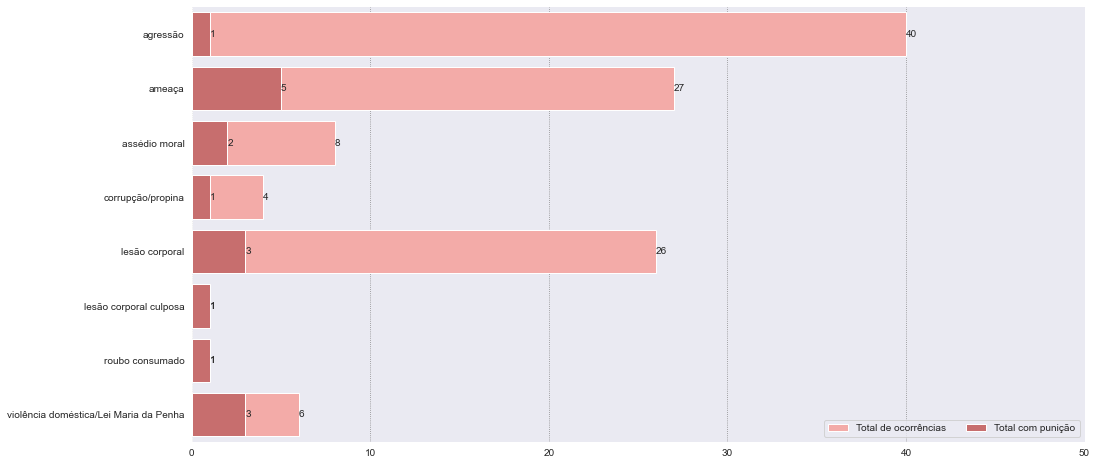

In [88]:
# Definição da proporção da imagem (f) e, consequentemente, dos eixos (ax)
f, ax = plt.subplots(figsize = (16, 8))
# Documentação: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

# BARRA MAIOR: Total de delitos
# Criação de gráfico de barras
sns.set_color_codes('pastel')
# Documentação: https://seaborn.pydata.org/generated/seaborn.set_color_codes.html
sns.barplot(x = 'total', # Coluna para eixo x
            y = 'delito', # Coluna para eixo y
            data = sind_final_selecao, # Origem dos dados
            label = 'Total de ocorrências', # Nome da barra para legenda
            color = 'r', # Cor
            ci = None # Intervalo de confiança
) 
# Documentação: https://seaborn.pydata.org/generated/seaborn.barplot.html

# BARRA MENOR: Total de punições
sns.set_color_codes('muted')
sns.barplot(x = 'quantidade', 
            y = 'delito', 
            data = sind_final_selecao,
            label = 'Total com punição', 
            color = 'r', 
            ci = None)

# Inserção de valores nas barras
for container in ax.containers:
    ax.bar_label(container)
# Documentação: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar_label.html

# Disposição da legenda
ax.legend(ncol = 2, # Duas colunas
          loc = 'lower right', # Canto inferior direito
          frameon = True # Borda da legenda
)
# Documentação: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html

# Definição de elementos
ax.set(xlim = (0, 50), # Limite para eixo x
       ylabel = '', # Título do eixo y
       xlabel = '' # Título do eixo x
)
# Documentação: https://matplotlib.org/stable/api/axes_api.html

sns.despine() # Remove output de texto
# Documentação: https://seaborn.pydata.org/generated/seaborn.despine.html

Agora vamos criar outro gráfico com o percentual. Temos `porcentagem`, mas como será algo visual, melhor multiplicar por 100.

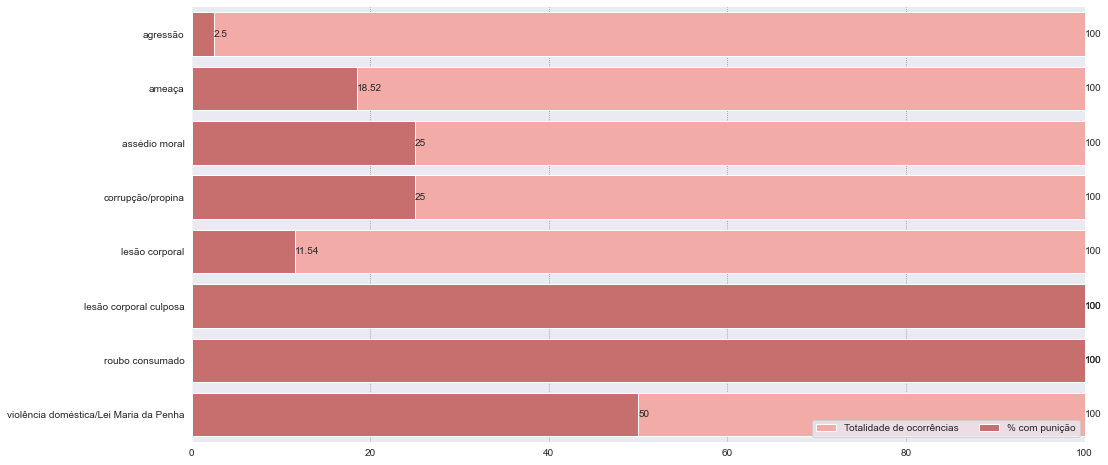

In [89]:
# Criação de colunas
sind_final_selecao['perc_visual'] = round(sind_final_selecao['porcentagem'] * 100, 2)
sind_final_selecao['perc_visual_100'] = 100

# Definição da proporção da imagem (f) e, consequentemente, dos eixos (ax)
f, ax = plt.subplots(figsize = (16, 8))

# BARRA MAIOR: 100% de cada delito
# Criação de gráfico de barras
sns.set_color_codes('pastel')
sns.barplot(x = 'perc_visual_100',
            y = 'delito',
            data = sind_final_selecao,
            label = 'Totalidade de ocorrências',
            color = 'r',
            ci = None
) 

# BARRA MENOR: percentual com punição
sns.set_color_codes('muted')
sns.barplot(x = 'perc_visual', 
            y = 'delito', 
            data = sind_final_selecao,
            label = '% com punição', 
            color = 'r', 
            ci = None)

# Inserção de valores nas barras
for container in ax.containers:
    ax.bar_label(container)

# Disposição da legenda
ax.legend(ncol = 2,
          loc = 'lower right',
          frameon = True
)

# Definição de elementos
ax.set(xlim = (0, 100),
       ylabel = '',
       xlabel = ''
)

sns.despine()

Agora, a mesma coisa, mas para inquéritos.

In [90]:
# Checagem
inq_final.info()
inq_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   delito       56 non-null     object 
 1   total        56 non-null     int64  
 2   punicao      56 non-null     object 
 3   quantidade   56 non-null     int64  
 4   porcentagem  56 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.3+ KB


,delito,total,punicao,quantidade,porcentagem
0,abandono de posto / função,2,sim,2,1.0
1,abuso de autoridade / poder,1,não,1,1.0
2,acidente de trânsito/colisão/choque,1,sim,1,1.0
3,acúmulo indevido de cargo,2,sim,2,1.0
4,adulteração de sinal de veículo automotor,1,sim,1,1.0


In [91]:
# Checagem da quantidade de delitos únicos
inq_final['delito'].nunique()

42

In [92]:
# Checagem dos delitos
inq_final['delito'].unique()

array(['abandono de posto / função', 'abuso de autoridade / poder',
       'acidente de trânsito/colisão/choque', 'acúmulo indevido de cargo',
       'adulteração de sinal de veículo automotor', 'agressão', 'ameaça',
       'apreensao de arma particular', 'ato incompatível com a função',
       'contravenções penais', 'corrupção/propina',
       'deixar de preservar local de crime', 'descumprimento de ordem',
       'desobediência', 'disparo de arma de fogo',
       'estupro de vulnerável', 'exercício de atividade laboral em LM',
       'exoneração ep', 'extravio / perda de arma / munição',
       'extravio / perda de bens patrimoniais', 'falsa comum. de crime',
       'falsidade de dcto publico',
       'falsificação de documentos particulares', 'falso testemunho',
       'falta de urbanidade', 'falta de zêlo com bem público',
       'faltar com a verdade', 'faltas consecutivas',
       'faltas interpoladas', 'furto', 'homicídio', 'homicídio culposo',
       'homicídio doloso', 'homic

In [93]:
# Lista de delitos
delitos_selecao = [
    'abuso de autoridade / poder', 'acidente de trânsito/colisão/choque', 
    'agressão', 'ameaça', 'corrupção/propina', 'deixar de preservar local de crime',
    'disparo de arma de fogo', 'extravio / perda de arma / munição',
    'estupro de vulnerável', 'furto', 'homicídio', 'homicídio culposo', 
    'homicídio doloso', 'latrocínio (roubo seguido de morte)', 'tortura', 
    'violência doméstica/Lei Maria da Penha'
]

# Seleção das ocorrências com punição
inq_final_selecao = inq_final[(inq_final['punicao'] == 'sim') & (inq_final['delito'].isin(delitos_selecao))]

# Checagem
inq_final_selecao.head()

,delito,total,punicao,quantidade,porcentagem
2,acidente de trânsito/colisão/choque,1,sim,1,1.000000
5,agressão,1,sim,1,1.000000
6,ameaça,3,sim,2,0.666667
13,deixar de preservar local de crime,1,sim,1,1.000000
17,disparo de arma de fogo,5,sim,5,1.000000


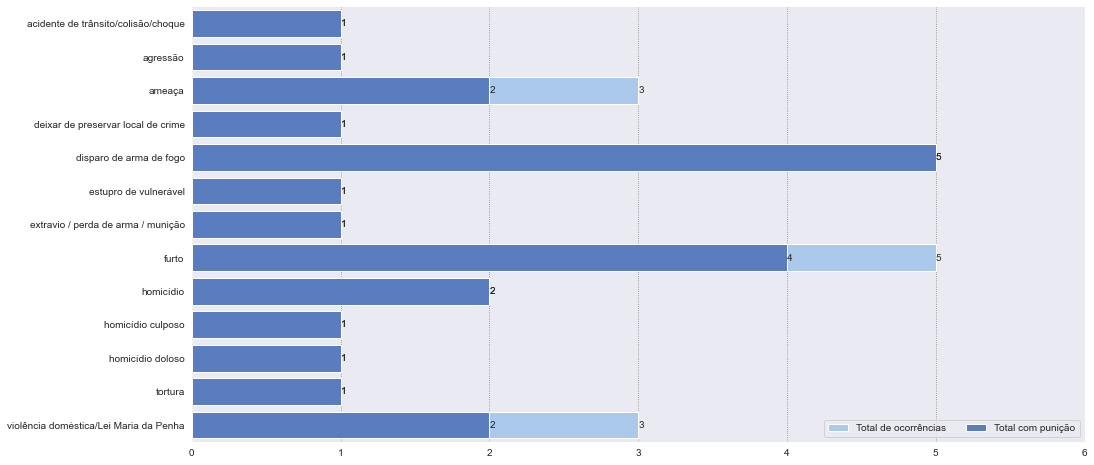

In [94]:
# Definição da proporção da imagem (f) e, consequentemente, dos eixos (ax)
f, ax = plt.subplots(figsize = (16, 8))

# BARRA MAIOR: Total de delitos
# Criação de gráfico de barras
sns.set_color_codes('pastel')
sns.barplot(x = 'total',
            y = 'delito',
            data = inq_final_selecao,
            label = 'Total de ocorrências',
            color = 'b',
            ci = None
) 

# BARRA MENOR: Total de punições
sns.set_color_codes('muted')
sns.barplot(x = 'quantidade', 
            y = 'delito', 
            data = inq_final_selecao,
            label = 'Total com punição', 
            color = 'b', 
            ci = None)

# Inserção de valores nas barras
for container in ax.containers:
    ax.bar_label(container)

# Disposição da legenda
ax.legend(ncol = 2,
          loc = 'lower right',
          frameon = True
)

# Definição de elementos
ax.set(xlim = (0, 6),
       ylabel = '',
       xlabel = ''
)

sns.despine()

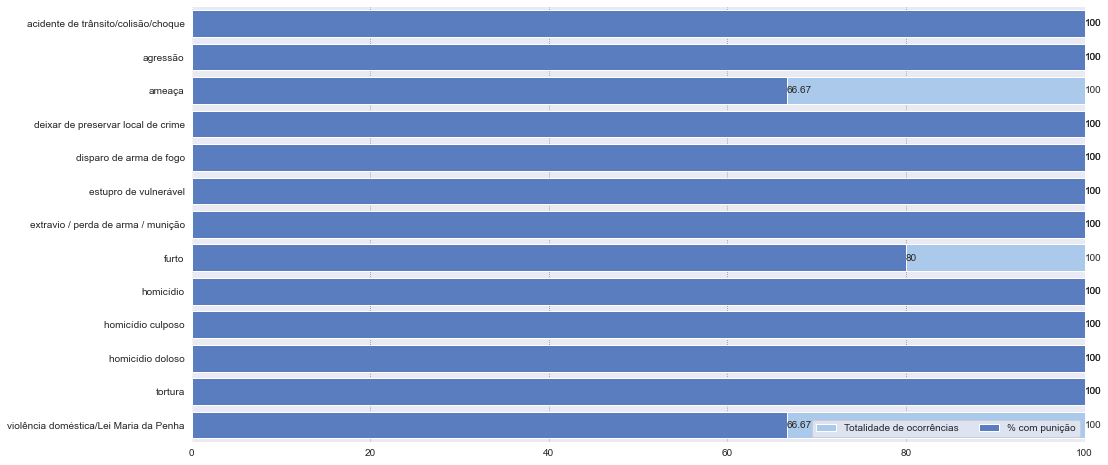

In [95]:
# Criação de colunas
inq_final_selecao['perc_visual'] = round(inq_final_selecao['porcentagem'] * 100, 2)
inq_final_selecao['perc_visual_100'] = 100

# Definição da proporção da imagem (f) e, consequentemente, dos eixos (ax)
f, ax = plt.subplots(figsize = (16, 8))

# BARRA MAIOR: Total de delitos
# Criação de gráfico de barras
sns.set_color_codes('pastel')
sns.barplot(x = 'perc_visual_100',
            y = 'delito',
            data = inq_final_selecao,
            label = 'Totalidade de ocorrências',
            color = 'b',
            ci = None
) 

# BARRA MENOR: Total de punições
sns.set_color_codes('muted')
sns.barplot(x = 'perc_visual', 
            y = 'delito', 
            data = inq_final_selecao,
            label = '% com punição', 
            color = 'b', 
            ci = None)

# Inserção de valores nas barras
for container in ax.containers:
    ax.bar_label(container)

# Disposição da legenda
ax.legend(ncol = 2,
          loc = 'lower right',
          frameon = True
)

# Definição de elementos
ax.set(xlim = (0, 100),
       ylabel = '',
       xlabel = ''
)

sns.despine()